# Protein-Protein Interaction
This notebook describes the necessary steps for the protein-protein interaction network for all the genes in our reconstruction

In [19]:
from tqdm.notebook import tqdm
import pandas as pd
import pickle
from google_sheet import GoogleSheet

# Data Fetching
import requests
import json
from pp_interactions import fetch_string_interactions, visualize_network

# Plotting
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
##### ----- Generate datasets from Google Sheet ----- #####

KEY_FILE_PATH = 'credentials.json'
SPREADSHEET_ID = '1DaAdZlvMYDqb7g31I5dw-ZCZH52Xj_W3FnQMFUzqmiQ'
gsheet_file = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
sec_recon_sheet = 'SecRecon'
secrecon = gsheet_file.read_google_sheet(sec_recon_sheet)

In [5]:
# Load Reconstruction

gene_dict_path = 'gene_dict.pkl'
with open(gene_dict_path, 'rb') as file:
    gene_dict = pickle.load(file)

# Create gene_list
gene_list = list(gene_dict.keys())

### 1.STRINGS - Sec Recon

In [6]:
G_string = fetch_string_interactions(gene_list)

# Save the network generated
nx.write_graphml(G_string, 'Network/string_interactions_sec_recon.graphml')

Fetching Interactions:  33%|█████▌           | 368/1130 [03:45<15:02,  1.18s/it]

No interaction found for HSP90AA4P


Fetching Interactions:  33%|█████▌           | 369/1130 [03:49<24:32,  1.93s/it]

No interaction found for HSP90AA5P


Fetching Interactions:  33%|█████▌           | 371/1130 [03:50<17:53,  1.41s/it]

No interaction found for HSP90AB2P


Fetching Interactions:  33%|█████▌           | 372/1130 [03:51<13:32,  1.07s/it]

No interaction found for HSP90AB3P


Fetching Interactions:  33%|█████▌           | 373/1130 [03:52<12:32,  1.01it/s]

No interaction found for HSP90AB4P


Fetching Interactions: 100%|████████████████| 1130/1130 [16:14<00:00,  1.16it/s]


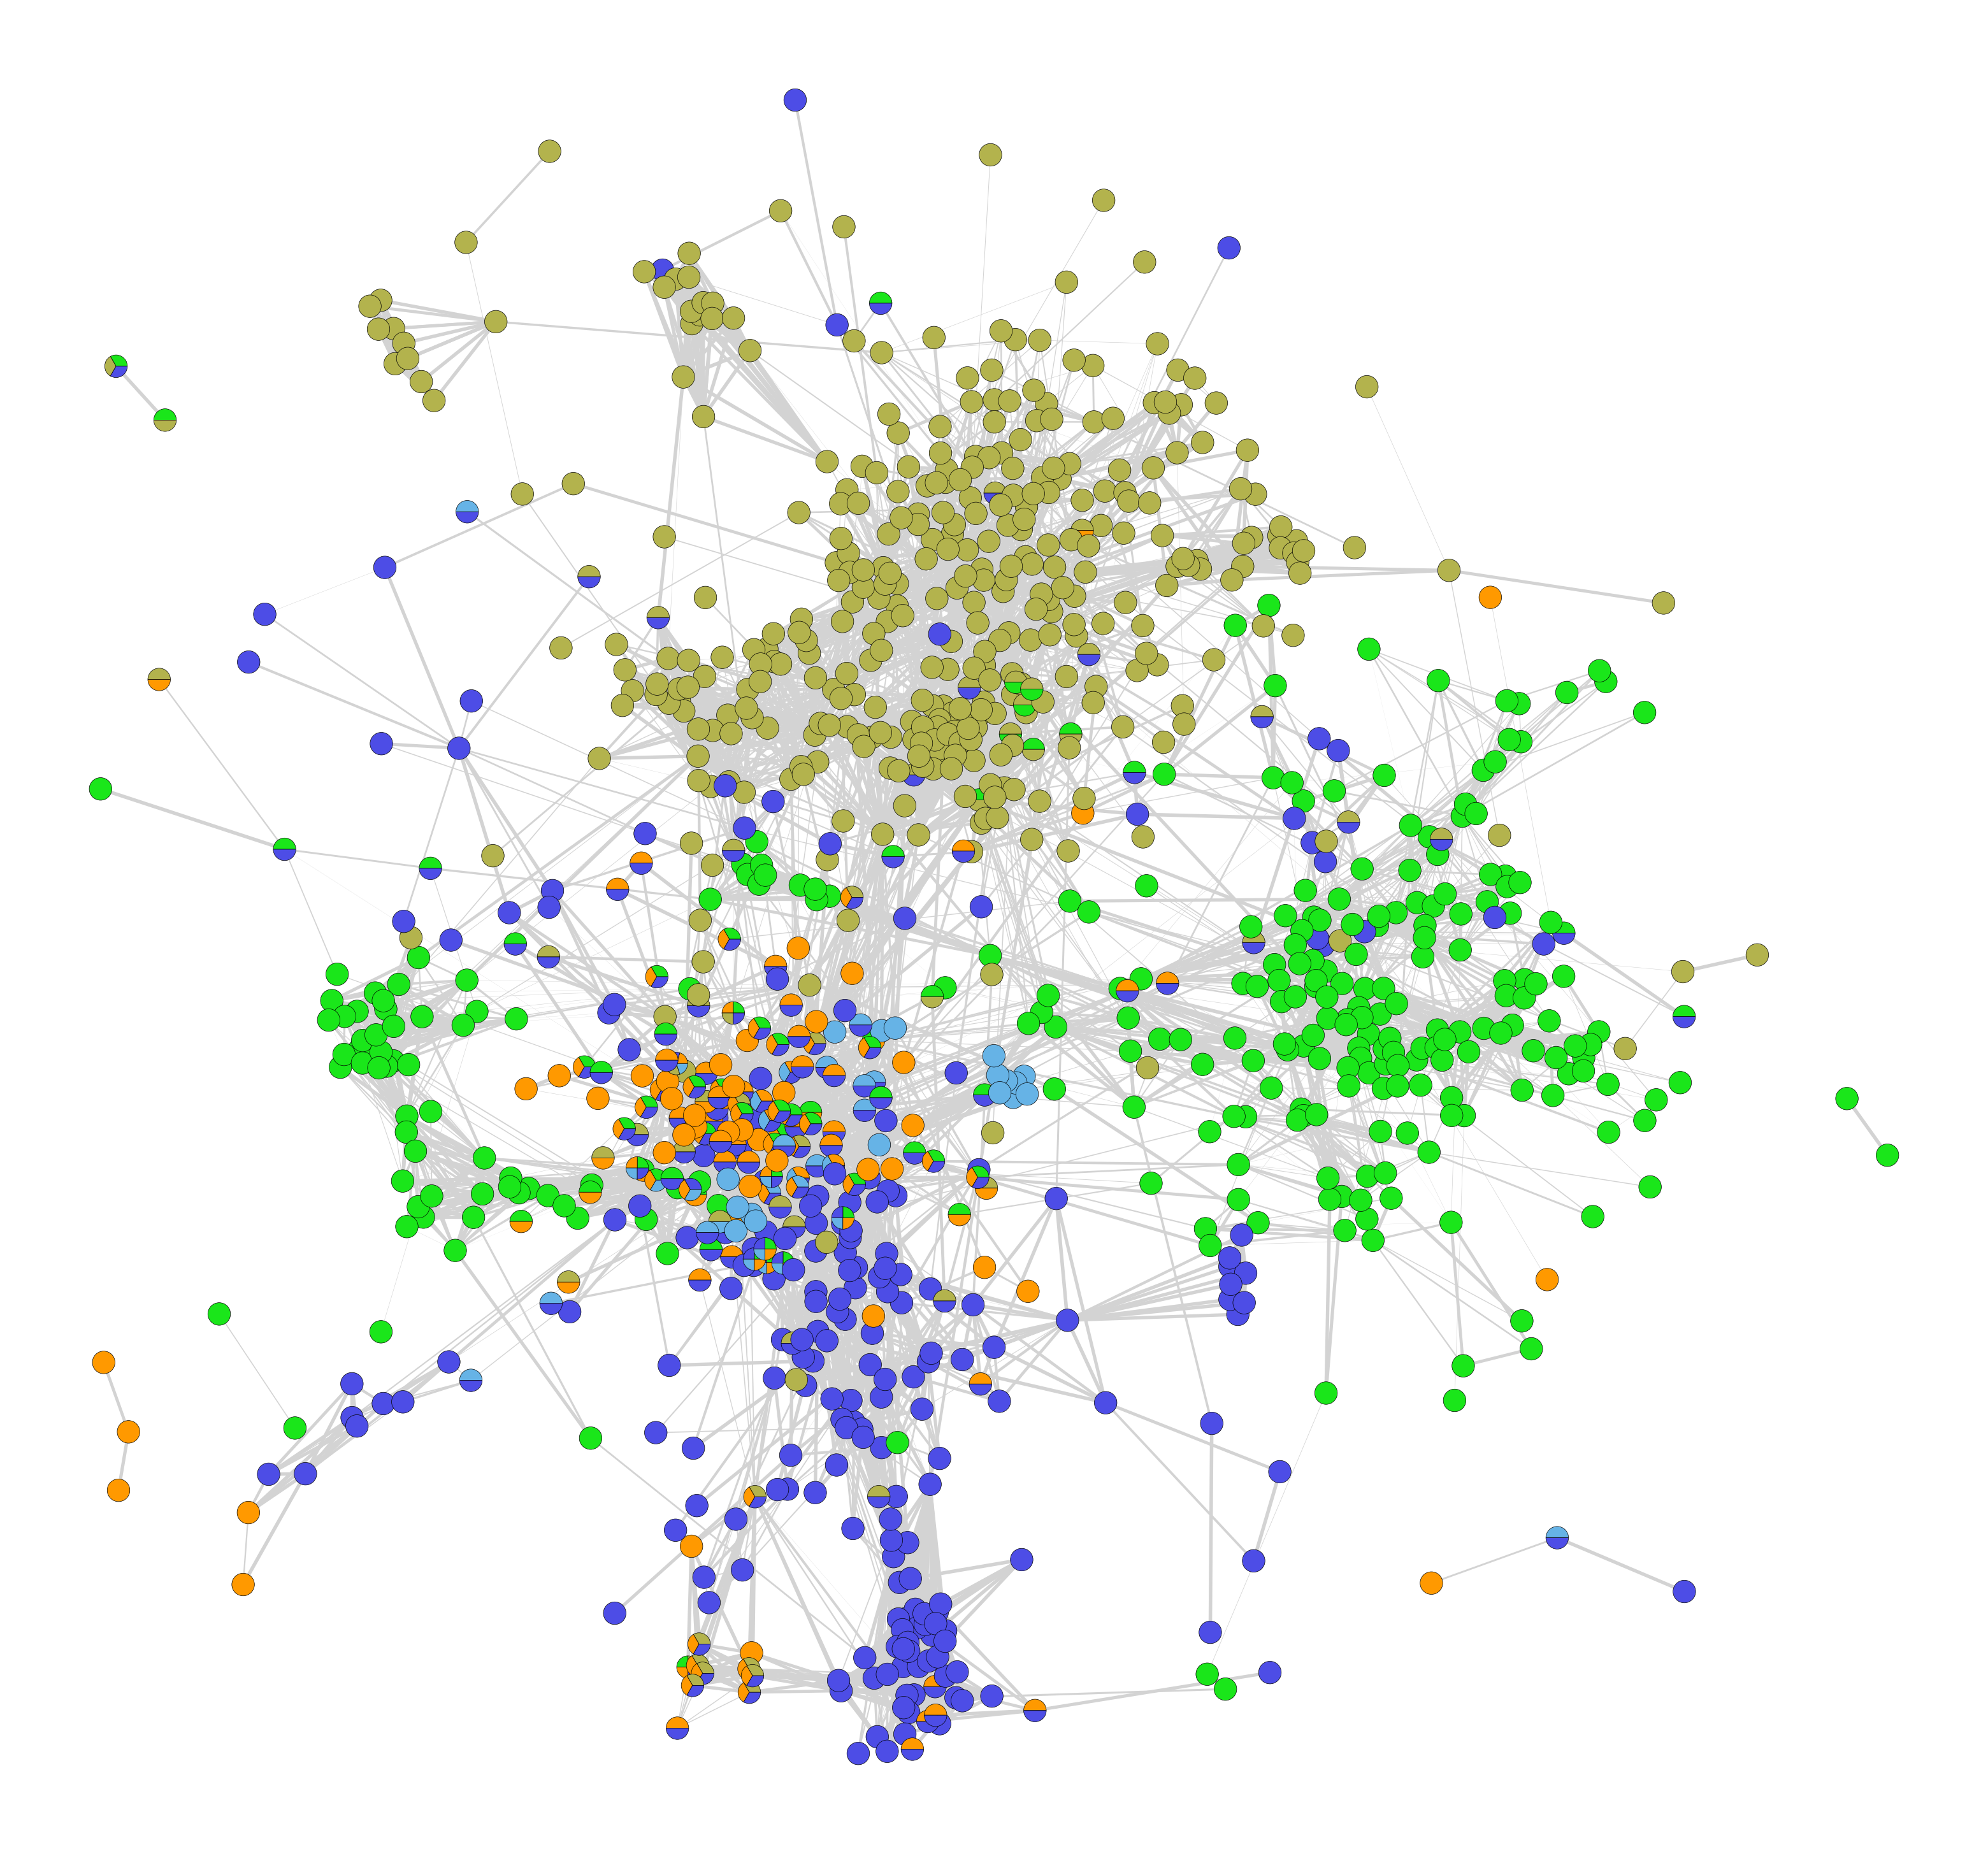

In [10]:
#G_string = nx.read_graphml('Network/string_interactions_sec_recon.graphml')
filename = f"Network/STRING_interactions_localizationcolor.png"
visualize_network(G=G_string, node_size=0.012, filename=filename, color_by='systems', gene_dict=gene_dict, legends=False) 

### 1.2 STRINGS - Sec Recon + Human Secretome

In [26]:
# Load Human Secretome df
human_secretome = pd.read_excel('Input/human_secretome.xlsx')
# Subset of all the secreted proteins
human_secretome = human_secretome[human_secretome['Annotated category'].str.contains('secreted', case=False)]

In [27]:
# Creating the dictionary
human_secretome_dict = {row['Gene name']: {'systems': ['Secreted'], 'subcellular_localization': ['Secreted']} for index, row in human_secretome.iterrows()}

In [28]:
# Merging human secretome dictionary with gene_dict
gene_sec_dict = gene_dict.copy()

for key, value in human_secretome_dict.items():
    if key not in gene_sec_dict:
        gene_sec_dict[key] = value

In [17]:
G_string = fetch_string_interactions(gene_sec_dict)

# Save the network generated
nx.write_graphml(G_string, 'Network/string_interactions_sec_recon_plus_secretome.graphml')

Fetching Interactions:  13%|██▏              | 368/2819 [02:04<13:21,  3.06it/s]

No interaction found for HSP90AA4P


Fetching Interactions:  13%|██▏              | 369/2819 [02:04<12:31,  3.26it/s]

No interaction found for HSP90AA5P


Fetching Interactions:  13%|██▏              | 371/2819 [02:05<15:23,  2.65it/s]

No interaction found for HSP90AB2P


Fetching Interactions:  13%|██▏              | 372/2819 [02:05<13:58,  2.92it/s]

No interaction found for HSP90AB3P


Fetching Interactions:  13%|██▏              | 373/2819 [02:06<18:22,  2.22it/s]

No interaction found for HSP90AB4P


Fetching Interactions: 100%|███████████████▉| 2814/2819 [31:54<00:05,  1.12s/it]

No interaction found for BX248415.1


Fetching Interactions: 100%|███████████████▉| 2818/2819 [31:57<00:01,  1.02s/it]

No interaction found for AP000790.4


Fetching Interactions: 100%|████████████████| 2819/2819 [31:58<00:00,  1.47it/s]

No interaction found for AP002347.1


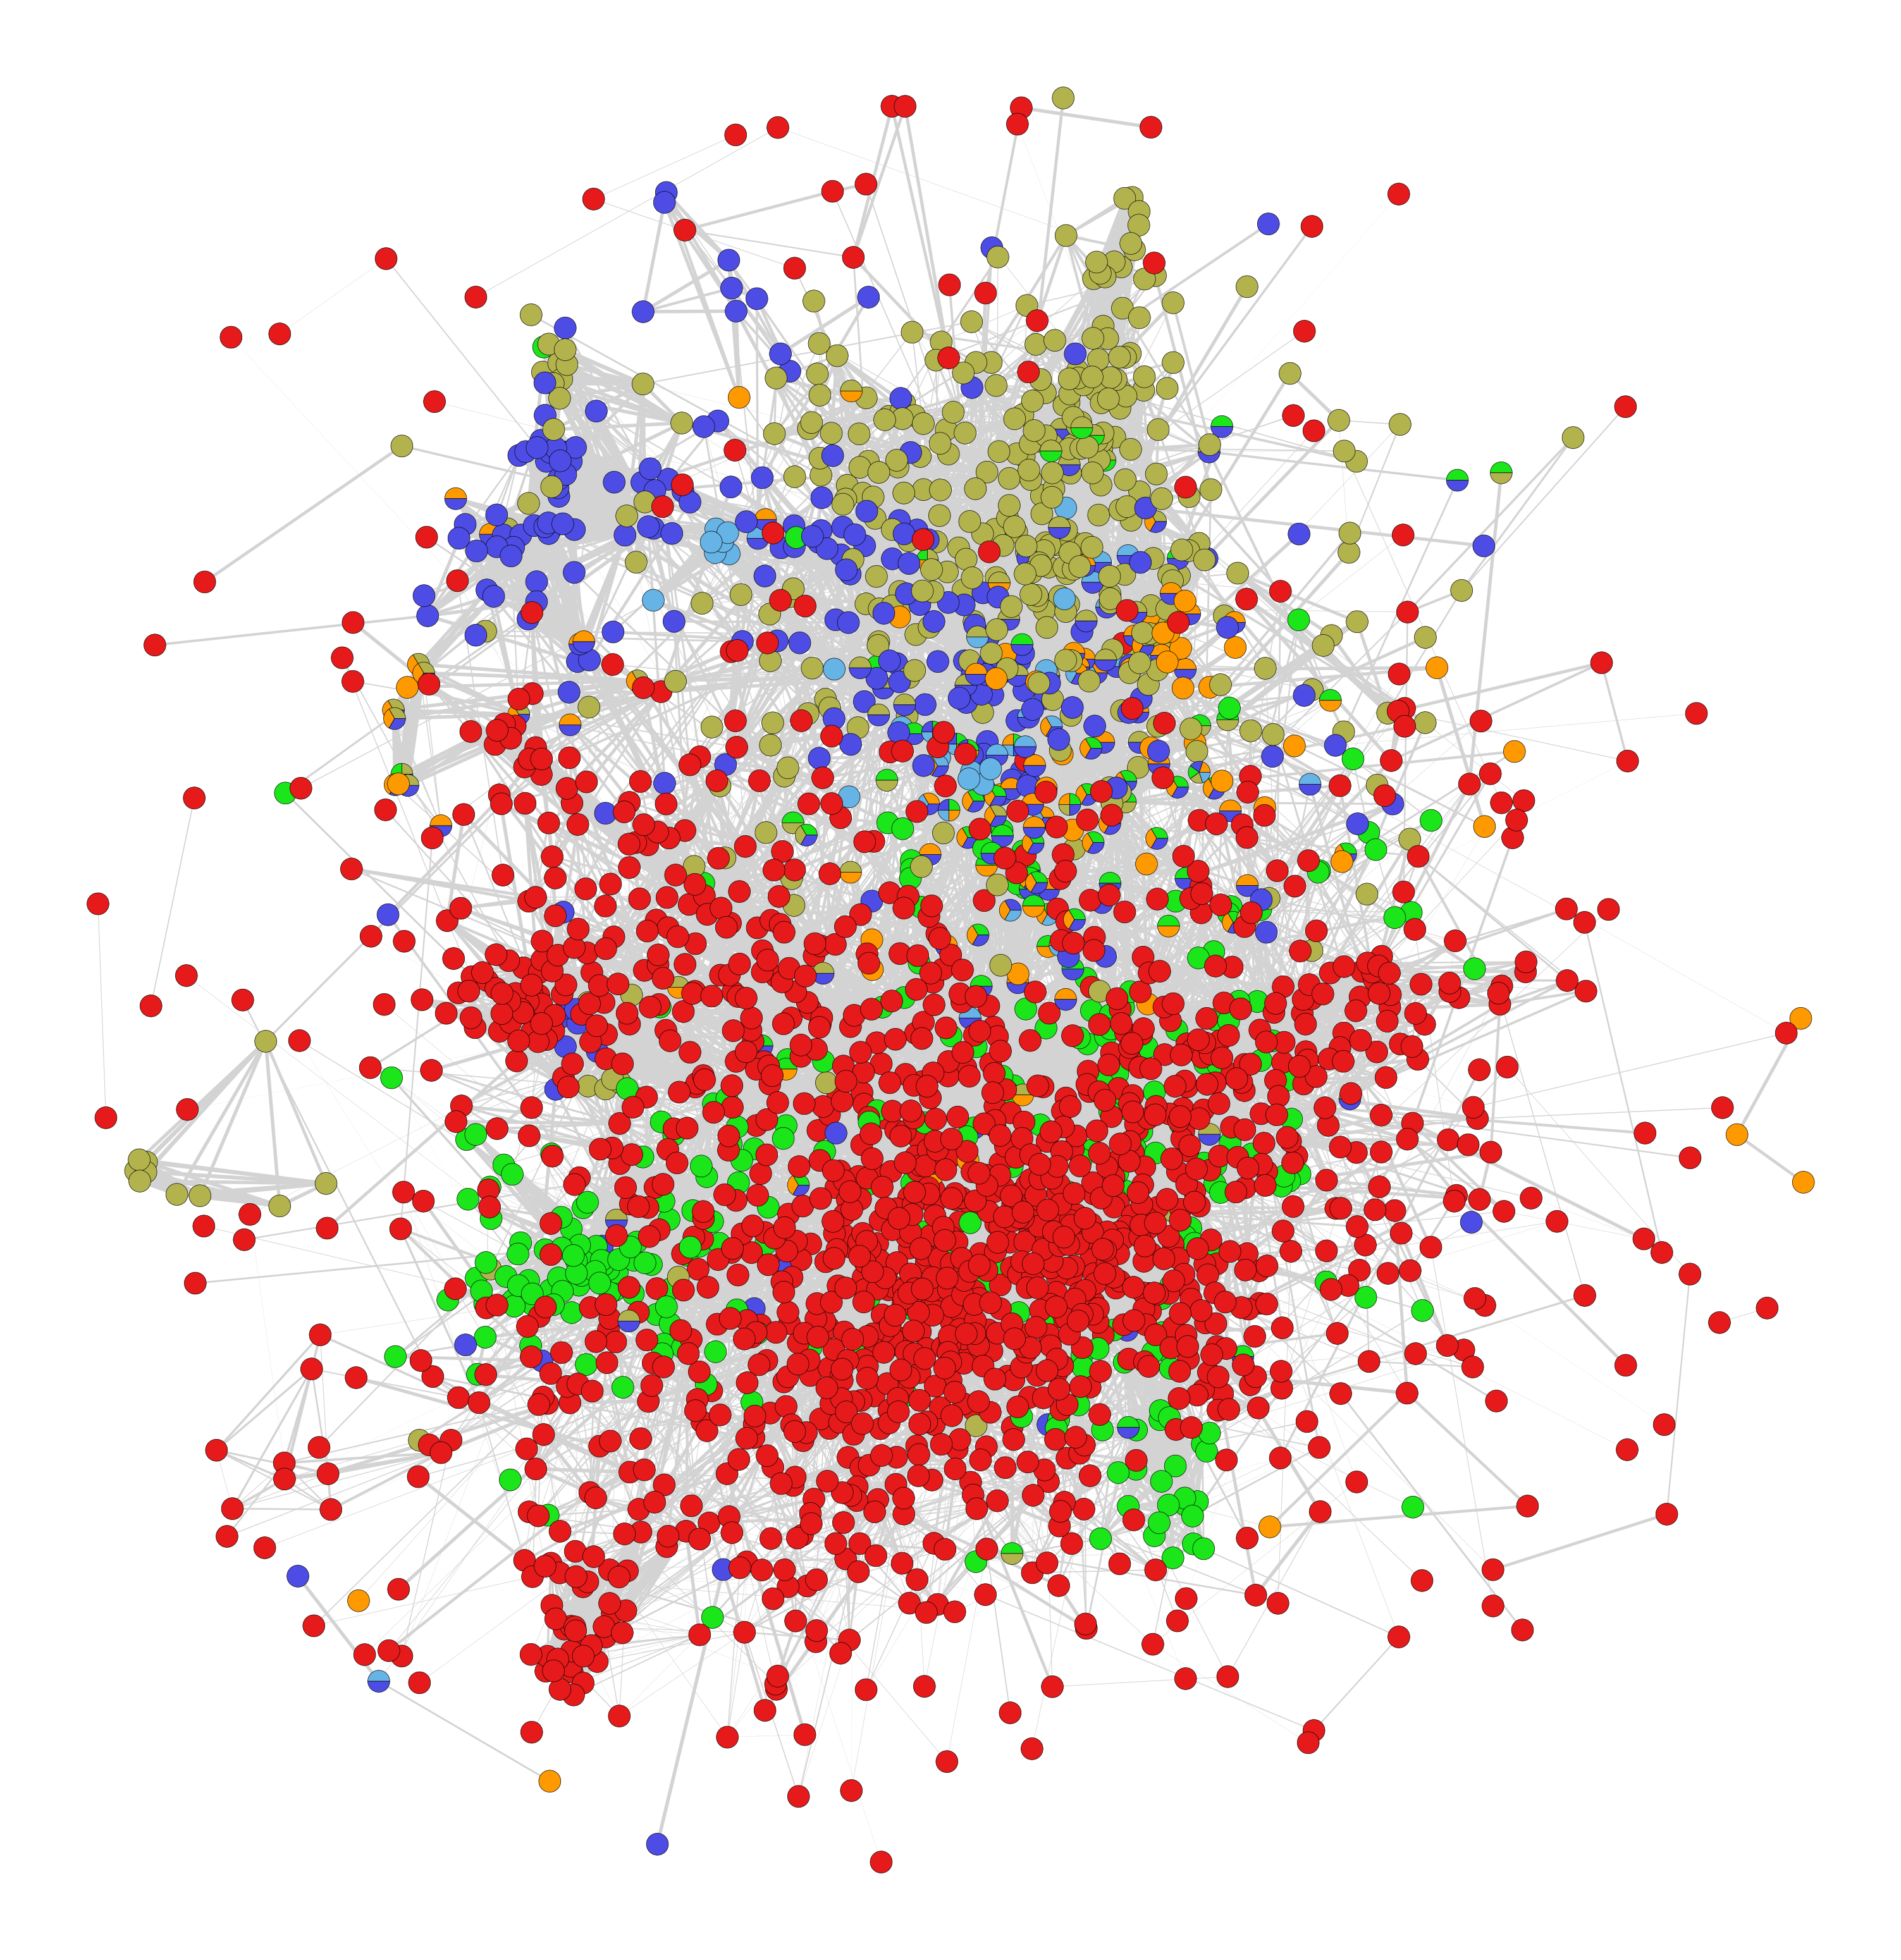

In [33]:
color_code = 'systems'

#G_string = nx.read_graphml('Network/string_interactions_sec_recon.graphml') # Uncoment if reading the G object
filename = f"Network/STRING_interactions_secrecon_secretome_{color_code}.png"
visualize_network(G=G_string, node_size=0.012, filename=filename, dist=0.15, color_by=color_code, gene_dict=gene_sec_dict, legends=False) 

### 1.3 STRINGS - Sec Recon divided by Systems + Human Secretome

In [32]:
# Create a dictionary to hold the system-specific dictionaries
system_specific_dicts = {system: {} for system in system_colors.keys()}

# Populate the system-specific dictionaries
for gene, attributes in gene_sec_dict.items():
    for system in attributes['systems']:
        if system in system_specific_dicts:
            system_specific_dicts[system][gene] = attributes

{'A3GALT2': {'systems': ['Post-translational modifications'],
  'subsystems': ['Glycosylation'],
  'processes': ['Glycosphingolipid'],
  'subprocesses': ['Isoglobo series'],
  'subcellular_localization': ['Golgi'],
  'protein_complex': ['']},
 'A4GALT': {'systems': ['Post-translational modifications'],
  'subsystems': ['Glycosylation'],
  'processes': ['Glycosphingolipid'],
  'subprocesses': ['Globo series'],
  'subcellular_localization': ['Golgi', 'Plasma Membrane'],
  'protein_complex': ['']},
 'A4GNT': {'systems': ['Post-translational modifications'],
  'subsystems': ['Glycosylation'],
  'processes': ['O-glycan'],
  'subprocesses': ['O-glycan mucin'],
  'subcellular_localization': ['Golgi'],
  'protein_complex': ['']},
 'ABL1': {'systems': ['Post-translational modifications',
   'Vesicle trafficking',
   'Proteostasis'],
  'subsystems': ['Cytoskeletal remodeling',
   'ER stress response/UPR',
   'Apoptosis',
   'Phosphorylation',
   'Post-Golgi'],
  'processes': ['Endocytosis', 'Kin

### 2.PrePPI
For this part, create a python dict with the uniprot IDs from secrecon as keys and the gene symbols as values, then mapped those gene symbols to the preppi database.

https://www.sciencedirect.com/science/article/pii/S0022283623001080?via%3Dihub
https://honiglab.c2b2.columbia.edu/PrePPI/

In [ ]:
# Initialize an empty dictionary to store the UniProt ID as key and the Gene Symbol as value
uniprot_gene_dict = {}

# Iterate through each row in the DataFrame
for index, row in secrecon.iterrows():
    # Check if the UniProt field is not None or NaN
    if pd.notna(row['HUMAN UNIPROT']):
        # Split the UniProt IDs by comma
        uniprot_ids = row['HUMAN UNIPROT'].split(',')
        # Map each UniProt ID to the gene symbol
        for uniprot_id in uniprot_ids:
            uniprot_gene_dict[uniprot_id.strip()] = row['GENE SYMBOL']

In [ ]:
preppi_file_path = 'Input/preppi_interactome/preppi.human_af.interactome.txt'
preppi_df = pd.read_csv(preppi_file_path, sep='\t')

In [ ]:
# Map 'prot1' and 'prot2' using the dictionary
preppi_df['prot1_gene_symbol'] = preppi_df['prot1'].map(uniprot_gene_dict)
preppi_df['prot2_gene_symbol'] = preppi_df['prot2'].map(uniprot_gene_dict)

In [ ]:
filtered_df = preppi_df.dropna(subset=['prot1_gene_symbol', 'prot2_gene_symbol'])

In [ ]:
# Initialize an empty graph
G_preppi = nx.Graph()

seen_interactions = set()

for i,row in filtered_df.iterrows():
    protein1 = row['prot1_gene_symbol']
    protein2 = row['prot2_gene_symbol']
    interaction_tuple = (protein1, protein2)
    # Remove proteins interacting with themselves
    if protein1 != protein2:
        # Check if interaction is already seen, considering both directions
        if interaction_tuple not in seen_interactions and (protein2, protein1) not in seen_interactions:
            score = row['total_score']
            # Add nodes and edges to the graph if interaction is new
            G_preppi.add_node(protein1)
            G_preppi.add_node(protein2)
            G_preppi.add_edge(protein1, protein2, weight=score)
            # Add to seen interactions in both orders
            seen_interactions.add(interaction_tuple)
            seen_interactions.add((protein2, protein1))

In [ ]:
len(G_preppi)

In [ ]:
filename = f"Network/PrePPI_interactions_localizationcolor.png"
visualize_network(G=G_preppi, node_size=0.012, filename=filename, dist=2.5, itrs=150, color_by='localization', legends=False) 